# Sistemas lineares e não-lineares

* Sistema não-linear x zero de função
* Métodos iterativos (Gauss-Seidel)
* Newton (Jacobiano)

# Sistema não-linear e zeros de  funções

Um sistema não-linear é aquela que não pode ser escrita como $ax_1 + bx_2 + cx_3 + \ldots = d$.

Ou seja, qualquer sistema que possua uma expressão do tipo $x^2$,$x\cdot y$, $\sin{(x)}$, $e^x$, etc é chamado de não-linear.

Uma forma de resolver um sistema não-linear é transformá-lo no problema de determinar o zero de um sistema de funções:

## Exemplo

Vamos resolver o sistema de equações **não-lineares**:

$
\left{
\begin{aligned}
x^2 + xy &= 10 \\
y + 3xy^2 &= 57
\end{aligned}
\right.
$

Uma forma já conhecida é tratar o sistema como uma função bidimensional e transformar o problema em encontrar o zero da função, ou seja:

$
\begin{aligned}
f_1(x,y)& = x^2 + xy - 10 \\
f_2(x,y)& = y + 3xy^2 - 57
\end{aligned}
$

Em seguida, podemos utilizar o comando `root` da biblioteca `scipy.optimize`:

In [1]:
import scipy.optimize as opt

def A(X):
    x = X[0]
    y = X[1]
    f0 = x**2 +x*y - 10
    f1 = y + 3*x*y**2 - 57
    return [f0, f1]

opt.root(A, [0,0])

    fjac: array([[-0.26296933, -0.96480419],
       [-0.96480419,  0.26296933]])
     fun: array([-3.55271368e-15,  7.10542736e-15])
 message: 'The solution converged.'
    nfev: 35
     qtf: array([ 3.31735729e-10, -1.22388545e-10])
       r: array([-26.94594667, -35.69446849,   7.60609155])
  status: 1
 success: True
       x: array([2., 3.])

In [3]:
A([2,3])

[0, 0]

In [ ]:
import numpy as np
N = 20000
A = np.random.randint(0, 100, (N,N))
b = np.random.randint(0, 100, (N,1))
x = np.linalg.solve(A,b)
#print(A)
#print(b)
#print(x)
print('Fim')

# Métodos iterativos

Caso o sistema seja muito grande, a eliminação de Gauss ou a decomposição LU podem ser **muito lentos**.
Nestas situações podemos utilizar os métodos iterativos.

Nos métodos iterativos partimos de uma estimativa inicial $x_0$ para os valores das incógnitas e estimamos um melhor valor $x_1$.
Em seguida, utilizamos o valor de $x_1$ para estimar $x_2$ e assim sucessivamente até a solução convergir.

# Gauss-Seidel

Considere um sistema linear de 3 equações:

$
\begin{bmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33} \\
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3
\end{bmatrix}
\begin{bmatrix} b_1 \\ b_2 \\ b_3
\end{bmatrix}
$

O método iterativo de Gauss-Seidel estima o valor de $x$ isolando o valor de $x_i$ em cada equação, e substituindo sucessivamente os valores mais atualizados:

$
\begin{aligned}
x'_1 &= \dfrac{b_1 - a_{12}x_{2} - a_{13}x_3}{a_{11}} \\
x'_2 &= \dfrac{b_2 - a_{21}x'_{1} - a_{23}x_3}{a_{22}} \\
x'_3 &= \dfrac{b_3 - a_{31}x'_{1} - a_{32}x'_2}{a_{33}} \\
\end{aligned}
$

Observe que em cada equação são utilizados sempre os valores mais atuais.

## Exemplo:

Seja o sistema abaixo:

\begin{aligned}
3x_1 - 0,1x_2 - 0,2x_3 &= 7,85 \\
0,1x_1 + 7x_2 - 0,3x_3 &= -19,3 \\
0,3x_1 - 0,2x_2 + 10x_3 &= 71,4 \\
\end{aligned}

In [4]:
x1 = 0
x2 = 0
x3 = 0

for i in range(10):
    x1 = (7.85 + 0.1*x2 + 0.2*x3)/3
    x2 = (-19.3 - 0.1*x1 + 0.3*x3)/7
    x3 = (71.4 - 0.3*x1 + 0.2*x2)/10
    print(f'{x1:.10f} {x2:.10f} {x3:.10f}')

2.6166666667 -2.7945238095 7.0056095238
2.9905565079 -2.4996246848 7.0002908111
3.0000318979 -2.4999879924 6.9999992832
3.0000003525 -2.5000000358 6.9999999887
2.9999999981 -2.5000000005 7.0000000000
3.0000000000 -2.5000000000 7.0000000000
3.0000000000 -2.5000000000 7.0000000000
3.0000000000 -2.5000000000 7.0000000000
3.0000000000 -2.5000000000 7.0000000000
3.0000000000 -2.5000000000 7.0000000000


Podemos generalizar a fórmula anterior na seguinte forma matricial:

$
x = d - Cx
$

onde

$
d = \begin{bmatrix} b_1 / a_{11} \\ b_2  / a_{22} \\ \vdots \\ b_n /a_{nn}
\end{bmatrix}
$

e

$
C = \begin{bmatrix} 
0 & a_{12}/a_{11} & a_{13}/a_{11} & \ldots & a_{1n}/a_{11} \\ 
a_{21}/a_{22} & 0 & a_{23}/a_{22} & \ldots & a_{2n}/a_{22} \\ 
\vdots \\
a_{n1}/a_{nn} & a_{n2}/a_{nn} & a_{n3}/a_{nn}  & \ldots & 0 \\ 
\end{bmatrix}
$


In [5]:
import numpy as np
N = 1000
A = np.random.randint(1, 100, (N,N))
A = A + np.identity(N)*np.random.randint(2000,3000, (N,1))
b = np.random.randint(1, 100, (N,1))
x = np.linalg.solve(A,b)

X = np.zeros((N,1))
d = np.zeros((N,1))
C = A.copy()

for i in range(N):
    d[i] = b[i]/A[i,i]
    C[i,:] = A[i,:]/A[i,i]
    C[i,i] = 0

for _ in range(30):
    Xold = X.copy()
    for i in range(N):
        X[i] = d[i] - np.dot(C[i,:], X)
    print(np.mean( abs((Xold - X)/X) ))

1.0
0.854705484642023
0.3245305062236452
0.1717043563010756
0.12893502075823352
0.1488399008288139
0.5057207884983923
0.1058602073893099
0.16928805423249477
0.15608157476113457
0.08596214239218421
0.10585502934969714
0.1356969967346986
0.09162217962680771
0.07123506549497075
0.09524030605431215
0.12580162289889818
0.12966396233497876
0.10384929888906294
0.07999098093729906
0.09286282706441512
0.0690056408952533
0.09083327883184811
0.06842312000089733
0.05786216876450662
0.05292769058094821
1.2335077320681158
0.04263046590355854
0.08864490826708657
0.20071950437106428


# Sistemas não-lineares

Considere o sistema não-linear:

\begin{aligned}
x_1^2 + x_1x_2 &= 10 \\
x_2 + 3x_1x_2^2 &= 57
\end{aligned}

Observe que o método de eliminação de Gauss ou decomposição LU não funcionam neste caso.

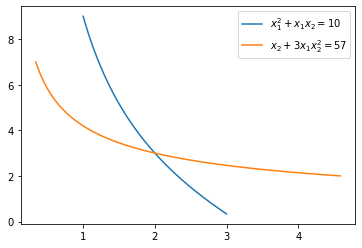

In [131]:
import matplotlib.pyplot as plt
import numpy as np

X1 = np.linspace(1,3,100)
Y2 = np.linspace(2,7,100)
Y1 = (10 - X1**2)/X1
X2 = (57 - Y2)/(3*Y2**2)

# A solução do sistema é a interseção das 2 curvas.
plt.plot(X1, Y1, X2, Y2)
plt.legend(['$x_1^2+x_1x_2=10$', '$x_2+3x_1x_2^2=57$'])

Uma das formas de resolver um sistema não-linear seria utilizando a substituição sucessiva de Gauss-Seidel, conforme visto anteriormente.
Porém a convergência depende da escolha adequada das equações e do ponto inicial:

In [1]:
import numpy as np

# Exemplo de escolha de funções onde a solução não converge
X = np.array([1.5, 3.5])
for _ in range(20):
    X[0] = (10 - X[0]**2)/X[1]
    X[1] = 57 - 3*X[0]*X[1]**2
    print(X)

[  2.21428571 -24.375     ]
[-2.09105181e-01  4.29713648e+02]
[ 2.31695574e-02 -1.27780418e+04]
[-7.82550515e-04  3.83377675e+05]
[ 2.60839377e-05 -1.15012725e+07]
[-8.69469006e-07  3.45038233e+08]
[ 2.89822954e-08 -1.03511469e+10]
[-9.66076519e-10  3.10534408e+11]
[ 3.22025506e-11 -9.31603224e+12]
[-1.07341835e-12  2.79480967e+14]
[ 3.57806118e-14 -8.38442902e+15]
[-1.19268706e-15  2.51532871e+17]
[ 3.97562354e-17 -7.54598612e+18]
[-1.32520785e-18  2.26379583e+20]
[ 4.41735948e-20 -6.79138750e+21]
[-1.47245316e-21  2.03741625e+23]
[ 4.90817720e-23 -6.11224875e+24]
[-1.63605907e-24  1.83367463e+26]
[ 5.45353023e-26 -5.50102388e+27]
[-1.81784341e-27  1.65030716e+29]


In [8]:
import numpy as np

# Exemplo de escolha de funções onde a solução converge:
X = np.array([1.5, 3.5])
for _ in range(25):
    X[0] = np.sqrt(10 - X[0]*X[1])
    X[1] = np.sqrt((57 - X[1])/(3*X[0]))
    print(X)

[2.17944947 2.86050599]
[1.94053388 3.04955067]
[2.02045629 2.98340475]
[1.99302813 3.00570436]
[2.00238524 2.9980543 ]
[1.99918491 3.00066556]
[2.00027865 2.99977255]
[1.99990475 3.00007776]
[2.00003256 2.99997342]
[1.99998887 3.00000909]
[2.0000038  2.99999689]
[1.9999987  3.00000106]
[2.00000044 2.99999964]
[1.99999985 3.00000012]
[2.00000005 2.99999996]
[1.99999998 3.00000001]
[2.00000001 3.        ]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]


## Newton-Raphson

Uma outra abordagem para resolver sistemas não-lineares é adaptar o método de Newton-Raphson.

É possível mostrar que, dado um sistema de equações não-lineares $f$:

\begin{aligned}
f_1(x_1, x_2, \ldots, x_n) &= 0\\
f_2(x_1, x_2, \ldots, x_n) &= 0\\
\vdots & \\
f_n(x_1, x_2, \ldots, x_n) &= 0\\
\end{aligned}

a série de Taylor para o sistema pode ser escrito como:

\begin{aligned}
f_{1,i+1} &= f_{1,i} + (x_{1,i+1}-x_{1,i}) \dfrac{\partial f_{1,i}}{\partial x_1} + \ldots + 
(x_{n,i+1}-x_{n,i}) \dfrac{\partial f_{1,i}}{\partial x_n} \\
f_{2,i+1} &= f_{2,i} + (x_{2,i+1}-x_{2,i}) \dfrac{\partial f_{2,i}}{\partial x_1} + \ldots + 
(x_{n,i+1}-x_{n,i}) \dfrac{\partial f_{2,i}}{\partial x_n} \\
\vdots & \\
f_{n,i+1} &= f_{n,i} + (x_{n,i+1}-x_{n,i}) \dfrac{\partial f_{n,i}}{\partial x_1} + \ldots + 
(x_{n,i+1}-x_{n,i}) \dfrac{\partial f_{n,i}}{\partial x_n} \\
\end{aligned}

onde os termos com índice $i$ representam o valor atual e os termos com índice $i+1$ representam o valor seguinte.

Da mesma forma que o método de Newton-Raphson para uma equação, fazemos o lado esquerdo interceptar o eixo $x$, ou seja, $f_{k,i+1} = 0$:

\begin{equation} \label{eq:newton1}
\begin{aligned}
0 &= f_{1,i} + (x_{1,i+1}-x_{i,1}) \dfrac{\partial f_{1,i}}{\partial x_1} + \ldots + 
(x_{n,i+1}-x_{n,1}) \dfrac{\partial f_{1,i}}{\partial x_n} \\
0 &= f_{2,i} + (x_{2,i+1}-x_{2,1}) \dfrac{\partial f_{2,i}}{\partial x_1} + \ldots + 
(x_{n,i+1}-x_{n,1}) \dfrac{\partial f_{2,i}}{\partial x_n} \\
\vdots & \\
0 &= f_{n,i} + (x_{n,i+1}-x_{n,1}) \dfrac{\partial f_{n,i}}{\partial x_1} + \ldots + 
(x_{n,i+1}-x_{n,1}) \dfrac{\partial f_{n,i}}{\partial x_n} \\
\end{aligned}
\end{equation}

Vamos organizar melhor a fórmula acima.
Primeiro, vamos definir uma matriz especial conhecida como Jacobiano:

\begin{equation}
J = 
\begin{bmatrix}
\dfrac{\partial f_{1,i}}{\partial x_1} & \dfrac{\partial f_{1,i}}{\partial x_2} & \ldots &
\dfrac{\partial f_{1,i}}{\partial x_n} \\
\dfrac{\partial f_{2,i}}{\partial x_1} & \dfrac{\partial f_{2,i}}{\partial x_2} & \ldots &
 \dfrac{\partial f_{2,i}}{\partial x_n} \\
\vdots & \\
\dfrac{\partial f_{n,i}}{\partial x_1} & \dfrac{\partial f_{n,i}}{\partial x_2} & \ldots &
 \dfrac{\partial f_{n,i}}{\partial x_n} \\
\end{bmatrix}
\end{equation}

A equação \ref{eq:newton1} pode ser reescrita como:

\begin{equation} \label{eq:newton2}
0 = f + J x_{i+1} - J x_i
\end{equation}

o que nos leva à fórmula de Newton-Rapshon para resolução de sistemas não-lineares:

\begin{equation} \label{eq:newton3}
x_{i+1} = x_i -J^{-1}f
\end{equation}


## Exemplo:

Considere o sistema não-linear:

\begin{aligned}
f_1(x_1,x_2) = x_1^2 + x_1x_2 - 10 \\
f_2(x_1,x_2) = x_2 + 3x_1x_2^2 - 57
\end{aligned}

que possui o Jacobiano:

\begin{equation}
J = 
\begin{bmatrix}
\dfrac{\partial f_{1,i}}{\partial x_1} & \dfrac{\partial f_{1,i}}{\partial x_2} \\
\dfrac{\partial f_{2,i}}{\partial x_1} & \dfrac{\partial f_{2,i}}{\partial x_2} 
\end{bmatrix} =
\begin{bmatrix}
2x_1 + x_2 & x_1 \\
3x_2^2 & 1 + 6x_1x_2
\end{bmatrix}
\end{equation}


In [11]:
import numpy as np
def f(X):
    x1, x2 = X
    f1 = x1**2 +x1*x2 - 10
    f2 = x2 + 3*x1*x2**2 - 57
    return [f1, f2]

def jac(X):
    x1, x2 = X
    return [ [2*x1+x2, x1], [3*x2**2, 1+6*x1*x2] ] 

# escolhendo um valor para X(0)
X = np.array([1.5, 3.5])
#X = np.array([1, 0])

# Fórmula de Newton-Raphson:
for _ in range(10):
    X = X - np.linalg.inv(jac(X)) @ f(X)
    print(X)
    
#print(f([4.39374419, -2.11778101]))

[2.03602882 2.8438751 ]
[1.99870061 3.00228856]
[1.99999998 2.99999941]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[-1.2210783495447686e-09, -3.0272643414264166e-07]


In [12]:
import scipy.optimize as opt

opt.root(f, [1,0])

    fjac: array([[-0.34264952, -0.93946331],
       [ 0.93946331, -0.34264952]])
     fun: array([-1.63424829e-13,  4.61852778e-13])
 message: 'The solution converged.'
    nfev: 22
     qtf: array([-2.59495803e-08, -2.17394449e-08])
       r: array([-24.56958758, -32.5131829 ,  -8.34340485])
  status: 1
 success: True
       x: array([2., 3.])

# Exercício



Resolva o sistema não-linear a seguir:

\begin{aligned}
x^2 = 5 - y^2 \\
y + 5xy = x^2
\end{aligned}

# Exercício

Resolva o sistema não-linear a seguir:

\begin{aligned}
x_1^3 +  2x_2 +x_3 = 4 \\
2x_1^2 + x_2^2 - 4x_3 = -1 \\
3x_1^2 - 4x_2 + x_3 = 0
\end{aligned}

utilizando a solução inicial $x_0 = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}$